Dokumentasi dan penjelasan tutor: 
https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Decision%20Trees%20and%20Random%20Forests.ipynb

In [1]:
#import
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## Random Forest Classifier

### Creating Decision Tree

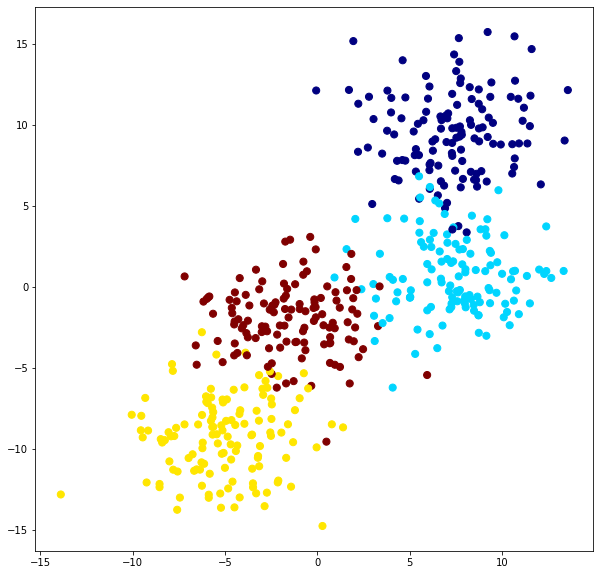

In [2]:
from sklearn.datasets import make_blobs

#n_samples merupakan jumlah sample 
#centers merupakan dibagi berapa? ada 125 sampels/center
#cluster_std merupakan standard deviasi dari centers (?)
#semakin tinggi std, setiap cluster semakin tidak terdistribusi merata 
#semakin rendah akan menjadi semakin separate, tidak dapat feel kata tutor
X, y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)

#Scatter plot
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [3]:
from sklearn.tree import DecisionTreeClassifier

Plot out decision boundaries using mesh grid

Pertama, pelajari dulu apa itu mesh grid

In [4]:
# nx, ny = (3,2)

In [5]:
# x = np.linspace(0, 1, nx)

In [6]:
#linspace untuk melihat dan mengetahui bahwa dari 0 sampai dengan 1 ada tiga elemen
# x

In [7]:
# y = np.linspace(0, 1, ny)

In [8]:
# y

Kodingan di atas harus di-comment karena berpengaruh ke visualisasi data
Penjelasan mengenai meshgrid ada di sini: 
https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

Meski demikian, saya masih agak kurang mengerti

#### Visualize function using meshgrid

In [9]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

Saya masih belum mengetahui cara bekerja fungsi di atas, yang pasti, fungsi ini digunakan untuk membuat visualisasi

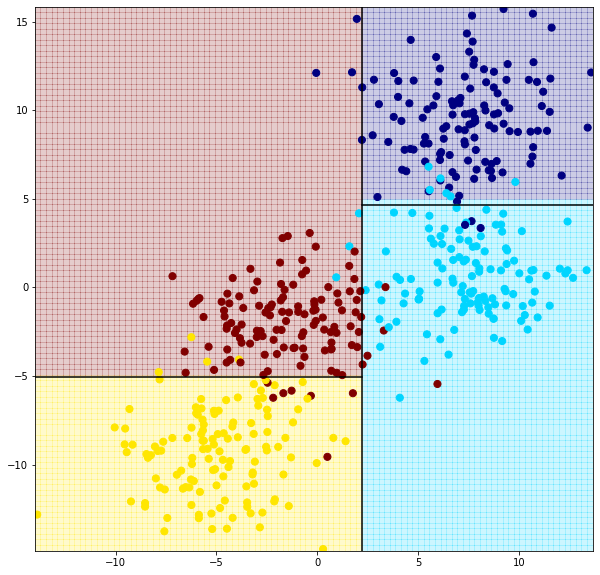

In [10]:
# Set model variable
# clf = DecisionTreeClassifier(max_depth=2,random_state=0)
clf = DecisionTreeClassifier(max_depth=2,random_state=0)


# Show Boundaries
visualize_tree(clf,X,y)

Dengan adanya meshgrid, data yang divisualisasikan bisa berzona seperti di atas. Kuning, merah, biru muda, dan biru.
Akhirnya keliatan mana yang miss classified (contohnya adalah poin biru di zona merah, dsb)

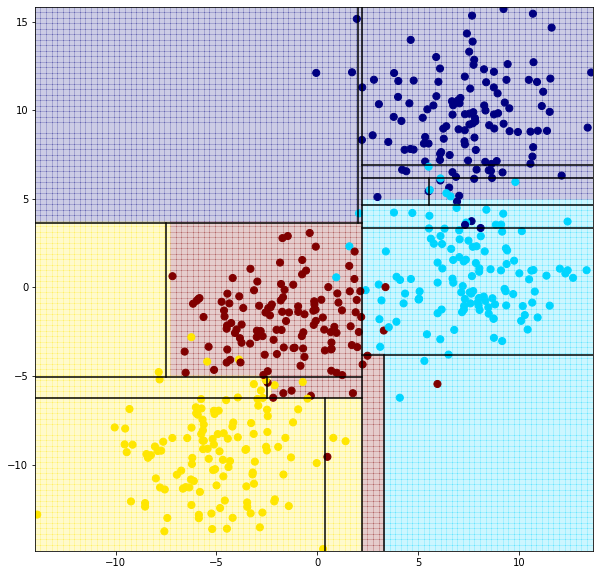

In [11]:
# 4 levels deep

# Set model variable
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

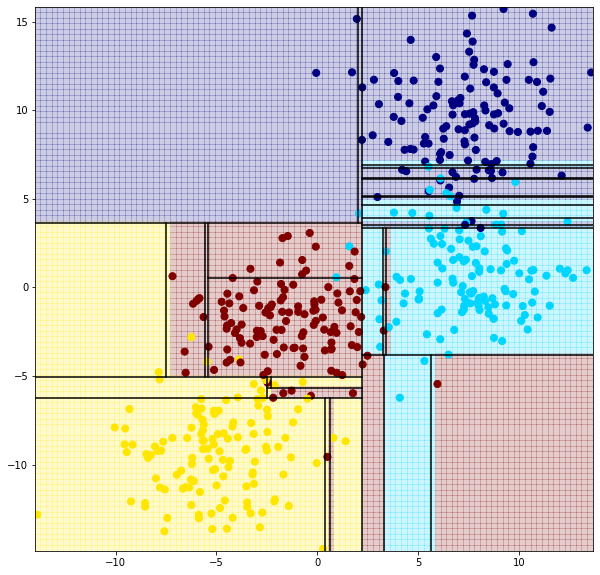

In [12]:
# 6 levels deep

# Set model variable
clf = DecisionTreeClassifier(max_depth=6,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

Semakin tinggi depth semakin terlihat overfitting, penjelasan overfitting ada pada dokumentasi

Bagaimana cara address overfitting? The answer is by creating an ensemble of decision trees


### Random Forest

Ensemble Methods essentially average the results of many individual estimators which over-fit the data. The resulting estimates are much more robust and accurate than the individual estimates which make them up! One of the most common ensemble methods is the Random Forest, in which the ensemble is made up of many decision trees which are in some way perturbed. Lets see how we can use Sci-Kit Learn to create a random forest (its actually very simple!)

Note that n_estimators stands for the numerb of trees to use. You would intuitively know that using more decision trees would be better, but after a certain amount of trees (somewhere between 100-400 depending on your data) the benefits in accuracy of adding more estimators significantly decreases and just becomes a load on your CPU.

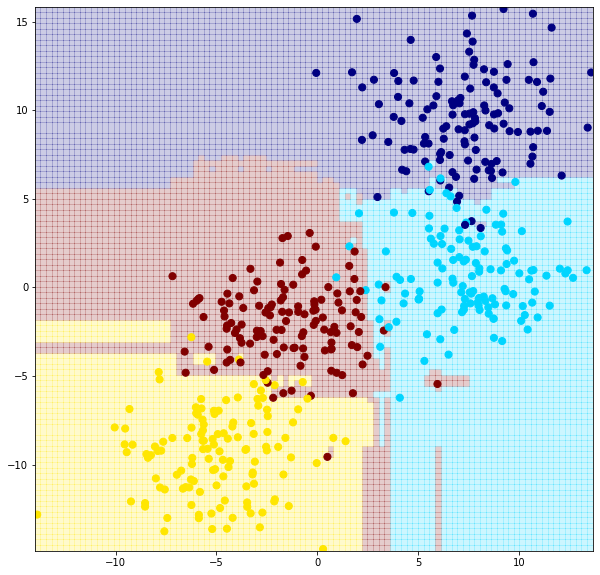

In [13]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0)

# Get rid of boundaries to avoid error
visualize_tree(clf,X,y,boundaries=False)

You can see that the random forest has been able to pick up features that the Decision Tree was not able to (although we must be careful of over-fitting with Random Forests too!)

While a visual is nice, a better way to evaluate our model would be with train test split if we had real data!

### Random Forest Regression

We can also use Random Forests for Regression! Let's see a quick example!

Let's imagine we have some sort of weather data thats sinusoidal in nature with some noise. It has a slow oscillation component, a fast oscillation component, and then a random noise component.

<ErrorbarContainer object of 3 artists>

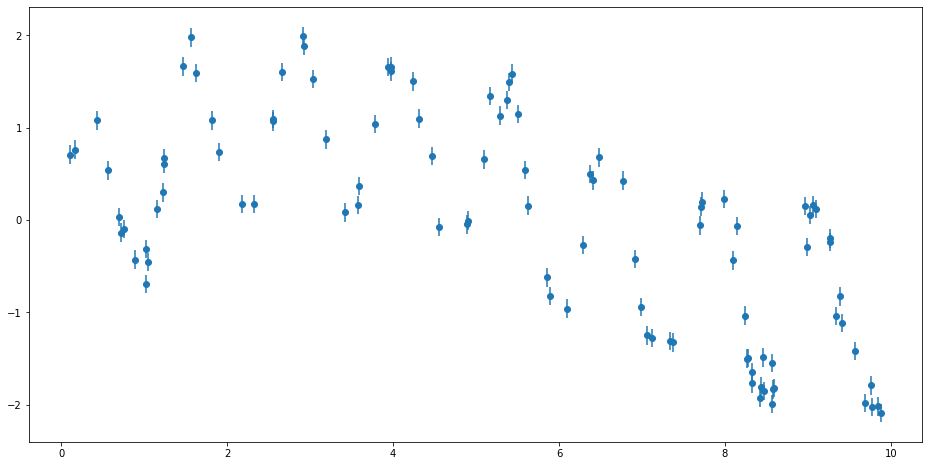

In [14]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    Generate random sinusoidal data for regression analysis. Does SciKit-Learn have this?
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# Call y for data with x
y = sin_model(x)

# Plot x vs y
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

Now lets use a Random Forest Regressor to create a fitted regression, obviously a standard linear regression approach wouldn't work here. And if we didn't know anything about the true nature of the model, polynomial or sinusoidal regression would be tedious.

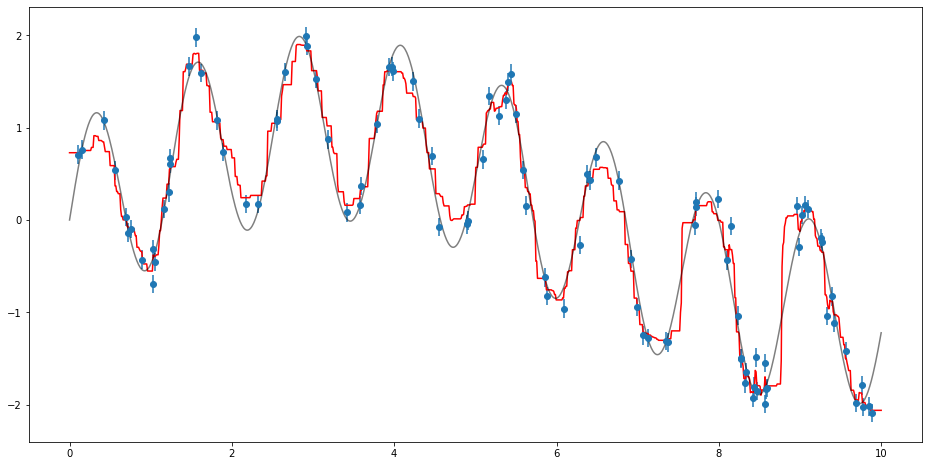

In [15]:
# X points
xfit = np.linspace(0, 10, 1000)

# Model
rfr = RandomForestRegressor(100)

# Fit Model (Format array for y with [:,None])
rfr.fit(x[:, None], y)

# Set predicted points
yfit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us even specifying a multi-period model!

This is a tradeoff between simplicity and thinking about what your data actually is.

#### Catatan: Masih perlu belajar untuk Decision Tree dan Random Forest. Untuk random forest regression, saya cuma copas dari dokumentasi Udemy dan masih sangat tidak mengerti, nanti akan di-revisit lagi

Dokumentasi: 

1. https://en.wikipedia.org/wiki/Random_forest
2. https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm